# First Keras project

Keeping it simple. Probably a little too simple, but let's finish this, learn what we learn and move on to something more educational.

> I wrote that, but then I discovered all sorts of things to learn. 

(I'm working with Kaggle's MNIST digist data. It's all preprocessed except for one little thing, which is why this is too easy.)

## Goals

The overarching goal is to combine what I know from Coursera's Deeplearning Specialization (first two courses) and be able to do what I can with an Scikit-Learn MLP Classifier, which I have used for neural networks before. To itemize:
- Build a model that can be fitted to data.
- Fit a model to data.
- Get some performance metrics about the model, and visualize them for better understanding.
- Tune the model using validation data.
- Optimize the model with the following hyperparameters: L2 regularization, dropout regularization, learning rate decay.




In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import my_keras_utils as my_utils

keras.__version__

'2.3.0-tf'

In [2]:
#tf.python.client.device_lib.list_local_devices() #verifies GPU type.
tf.config.experimental.list_physical_devices('GPU')#verifies GPU detected

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
try: ## this means that if I re-run all cells, I don't have to wait for pd.read_csv, which is a little slow.
    dataframe.head()
except NameError:
    dataframe = pd.read_csv('data/train.csv')
dev_df = dataframe.sample(n=3000, random_state=1)
train_df = dataframe.drop(dev_df.index)
assert train_df.shape[1] == 785 #should be 784 + 1

In [4]:
## I have some learning to do with datasets. 
## So the cells below don't get used as of 16/11/20.

def dataframe_to_dataset(dataframe, batch_size=64, label='label'):
    ds = tf.data.Dataset.from_tensor_slices((dataframe.drop(label,axis=1).to_numpy(), dataframe[label]))
    ds.shuffle(buffer_size=len(dataframe))
    ds.batch(batch_size)
    return ds

#dev_ds = dataframe_to_dataset(dev_df)
#train_ds = dataframe_to_dataset(train_df)

In [25]:
from tensorflow.keras import layers

##Build the model
inputs = keras.Input(shape=(784))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs,outputs=outputs, name='simple_model')
model.summary()

Model: "simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
## Cool. 
## Compile it.

model.compile(optimizer="adam", 
                loss="sparse_categorical_crossentropy",
                metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
            )
(X, y) = (train_df.drop('label',axis=1).to_numpy(), train_df['label'].to_numpy())
(X_val, y_val) = (dev_df.drop('label', axis = 1).to_numpy(), dev_df['label'].to_numpy())
assert X.shape[1] == 784   #makes sure shape is correct.
assert X.shape[0] == y.shape[0]

# run once to see if everything is in order, or comment out and go to next cell
# model.fit(X, y, epochs=1, batch_size=64, validation_data=(X_val, y_val))

In [23]:
## 25 epochs to get close to 0 loss.
batch_size = 512 ## Trial and error reveals this to be quick without stochastic bumps.
history = model.fit(X, y, epochs=25, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/25
153/153 [==============================] - 1s 6ms/step - loss: 0.5416 - acc: 0.8548 - val_loss: 0.2536 - val_acc: 0.9290
Epoch 2/25
153/153 [==============================] - 1s 4ms/step - loss: 0.2004 - acc: 0.9409 - val_loss: 0.1829 - val_acc: 0.9480
Epoch 3/25
153/153 [==============================] - 1s 5ms/step - loss: 0.1450 - acc: 0.9577 - val_loss: 0.1523 - val_acc: 0.9557
Epoch 4/25
153/153 [==============================] - 1s 5ms/step - loss: 0.1153 - acc: 0.9667 - val_loss: 0.1325 - val_acc: 0.9617
Epoch 5/25
153/153 [==============================] - 1s 5ms/step - loss: 0.0933 - acc: 0.9725 - val_loss: 0.1199 - val_acc: 0.9653
Epoch 6/25
153/153 [==============================] - 1s 4ms/step - loss: 0.0776 - acc: 0.9768 - val_loss: 0.1102 - val_acc: 0.9677
Epoch 7/25
153/153 [==============================] - 1s 5ms/step - loss: 0.0661 - acc: 0.9804 - val_loss: 0.1116 - val_acc: 0.9687
Epoch 8/25
153/153 [==============================] - 1s 5ms/step - loss: 0.

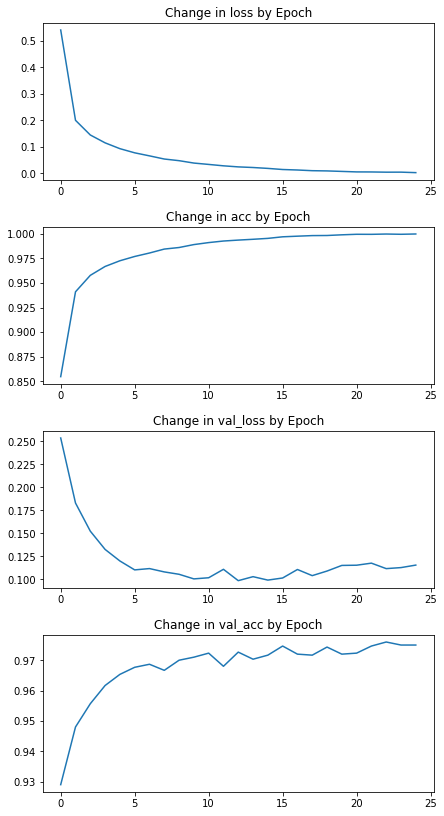

In [24]:
my_utils.history_plot(history)

In [25]:
## We can now babysit by re-running until there's no consistent improvement in 
## training loss.

history = model.fit(X, y, epochs=10, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/10
153/153 [==============================] - 1s 4ms/step - loss: 0.0021 - acc: 0.9999 - val_loss: 0.1164 - val_acc: 0.9750
Epoch 2/10
153/153 [==============================] - 1s 4ms/step - loss: 0.0023 - acc: 0.9998 - val_loss: 0.1179 - val_acc: 0.9737
Epoch 3/10
153/153 [==============================] - 1s 5ms/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.1413 - val_acc: 0.9720
Epoch 4/10
153/153 [==============================] - 1s 5ms/step - loss: 0.0231 - acc: 0.9926 - val_loss: 0.1415 - val_acc: 0.9707
Epoch 5/10
153/153 [==============================] - 1s 5ms/step - loss: 0.0140 - acc: 0.9952 - val_loss: 0.1431 - val_acc: 0.9753
Epoch 6/10
153/153 [==============================] - 1s 5ms/step - loss: 0.0034 - acc: 0.9995 - val_loss: 0.1301 - val_acc: 0.9770
Epoch 7/10
153/153 [==============================] - 1s 5ms/step - loss: 0.0018 - acc: 0.9999 - val_loss: 0.1266 - val_acc: 0.9770
Epoch 8/10
153/153 [==============================] - 1s 5ms/step - loss: 0.

## First ever Keras model complete.

That model was doomed to overfit the data; after about 45 epochs, acc = 100%. Validation loss has actually been increasing
despite the accuracy being consistently between .972 and .974
Next, I learn to add L2 regularization to reduce variance.

We can [add regularizers to layers](https://keras.io/api/layers/regularizers/) by specifying a regularizer.

### Our next model with include L2 regularization

In [75]:
##Build a model with regularization

## I ran this once with alpha = .01 and it made very slow progress. That might be necessary,
## but I am starting with a conservative .001. We don't have that much variance in the
## simple model.

rate = .0015  #regularization rate

inputs = keras.Input(shape=(784))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Dense(100, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(rate))(x)
x = layers.Dense(100, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(rate))(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_reg = keras.Model(inputs=inputs,outputs=outputs, name='L2_Regularized_Model')
model_reg.summary()


Model: "L2_Regularized_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
rescaling_12 (Rescaling)     (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
## Compile and run once to see if everything looks right
model_reg.compile(optimizer="adam", ## Compile and run once to see if everything looks right
model_reg.compile(optimizer="adam", 
                loss="sparse_categorical_crossentropy",
                metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
            )
model_reg.fit(X, y, epochs=1, batch_size=batch_size, validation_data=(X_val, y_val))
                loss="sparse_categorical_crossentropy",
                metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
            )
model_reg.fit(X, y, epochs=1, batch_size=batch_size, validation_data=(X_val, y_val))

153/153 [==============================] - 1s 6ms/step - loss: 0.7510 - acc: 0.8486 - val_loss: 0.4590 - val_acc: 0.9233


In [28]:
reg_model_history = model_reg.fit(X, y, epochs=100, verbose = 2, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/100
153/153 - 1s - loss: 0.3856 - acc: 0.9401 - val_loss: 0.3703 - val_acc: 0.9413
Epoch 2/100
153/153 - 1s - loss: 0.3202 - acc: 0.9532 - val_loss: 0.3253 - val_acc: 0.9493
Epoch 3/100
153/153 - 1s - loss: 0.2796 - acc: 0.9620 - val_loss: 0.2908 - val_acc: 0.9577
Epoch 4/100
153/153 - 1s - loss: 0.2517 - acc: 0.9673 - val_loss: 0.2728 - val_acc: 0.9580
Epoch 5/100
153/153 - 1s - loss: 0.2302 - acc: 0.9703 - val_loss: 0.2452 - val_acc: 0.9663
Epoch 6/100
153/153 - 1s - loss: 0.2121 - acc: 0.9734 - val_loss: 0.2288 - val_acc: 0.9693
Epoch 7/100
153/153 - 1s - loss: 0.2003 - acc: 0.9753 - val_loss: 0.2284 - val_acc: 0.9643
Epoch 8/100
153/153 - 1s - loss: 0.1891 - acc: 0.9774 - val_loss: 0.2121 - val_acc: 0.9693
Epoch 9/100
153/153 - 1s - loss: 0.1791 - acc: 0.9790 - val_loss: 0.2052 - val_acc: 0.9683
Epoch 10/100
153/153 - 1s - loss: 0.1691 - acc: 0.9805 - val_loss: 0.2020 - val_acc: 0.9683
Epoch 11/100
153/153 - 1s - loss: 0.1639 - acc: 0.9806 - val_loss: 0.1988 - val_acc: 0.96

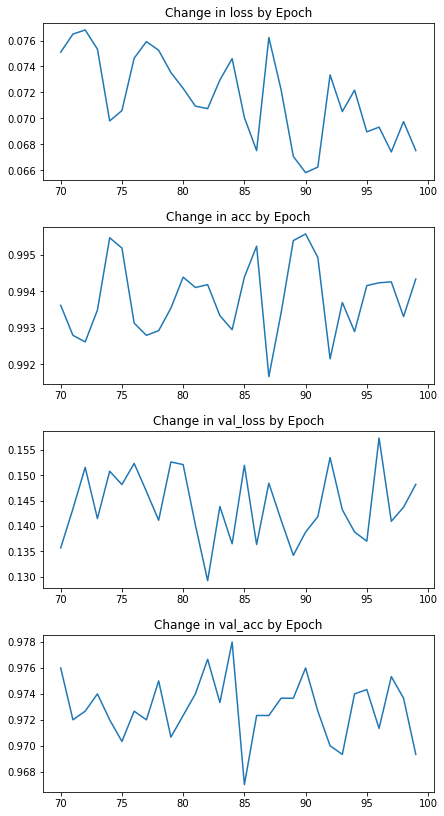

In [29]:
## View the last several epochs
my_utils.history_plot(reg_model_history, start_epoch=70)

## Punch list


### Matplotlib stuff

This is straightforward stuff you already know how to do. **TensorBoard** is the preferred way to visualize with Keras, but I just need a simple visualization right now. (In fact, it was implemented above.) The above let's me see that I need to implement some learning rate decay because my gradient descent is looks to be jumping past the local minimum as loss approaches .07. The trend is in the right direction, though.

### Learning rate decay

I found a solid Stackoverflow [discussion](https://stackoverflow.com/questions/59737875/keras-change-learning-rate) that cuts right to the chase. IMplementation: easy; tuning: not easy.


In [30]:
from tensorflow.keras.callbacks import LearningRateScheduler

LearningRateScheduler?
keras.optimizers.Adam?

Init signature:
keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam',
    **kwargs,
)
Docstring:     
Optimizer that implements the Adam algorithm.

Adam optimization is a stochastic gradient descent method that is based on
adaptive estimation of first-order and second-order moments.
According to the paper
[Adam: A Method for Stochastic Optimization. Kingma et al.,
2014](http://arxiv.org/abs/1412.6980), the method is "*computationally
efficient, has little memory requirement, invariant to diagonal rescaling of
gradients, and is well suited for problems that are large in terms of
data/parameters*".

For AMSGrad see [On The Convergence Of Adam And Beyond.
Reddi et al., 5-8](https://openreview.net/pdf?id=ryQu7f-RZ).
Init docstring:
Construct a new Adam optimizer.

If amsgrad = False:

  initialize $m_0$ as 1st moment vector
  initialize $v_0$ as 2nd moment vector

  The update rule for $\theta$ with gradien

In [216]:
## Similar stackover flow.
## This implements an exponential decay with beta = .85, 
## At each epoch, the learning rate is reduced by a factor of .85^(epoch/decay step)
## The decay step of SOF was 1; I'm trying 5 
## I would prefer not to use this until I've seen a graph of the decay.
def lr_scheduler(epoch, lr):
    decay_rate = 0.9
    decay_step = 10
            
    if epoch % decay_step == 0 and epoch:
        ## I think this is wrong. Should be lr_init, not current lr.
        ## There are ways to implement, but I will do that later.
        return lr * pow(decay_rate, np.floor(epoch / decay_step))
    else:
        return lr

## Here's a simple one that we tune by watching.
## It's what I looked into.
def lr_schedule_fixed(epoch, lr):

    if epoch % 100 == 0 and epoch != 0:
        lr = lr * .6
    
    return lr

## We add the learning rate scheduler to our callbacks.
## I haven't mentioned callbacks yet.
## See https://keras.io/guides/writing_your_own_callbacks/

callbacks = [LearningRateScheduler(lr_schedule_fixed, verbose=0)]

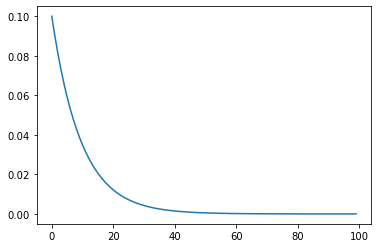

In [185]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.arange(0,100),.1*np.power(np.ones(100)*.9,np.arange(0,100)))


In [238]:
## This model is identical to the L2 regularized one; 

rate = .0005

inputs = keras.Input(shape=(784))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Dense(100, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(rate))(x)
x = layers.Dense(100, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(rate))(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_lr_decay = keras.Model(inputs=inputs,outputs=outputs, name='L2_Regularized_with_LR_decay')
model_lr_decay.summary()
#my_utils.history_plot(reg_model_history, start_epoch=70)
## specify the optimizer
#init_learning_rate = .001 #.001 is the default; 
optimizer = keras.optimizers.Adam(.0005)

## Compile and run once to see if everything looks right
model_lr_decay.compile(optimizer=optimizer, 
                loss="sparse_categorical_crossentropy",
                metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
            )
epochs = 0
initial_epoch = 0

Model: "L2_Regularized_with_LR_decay"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
rescaling_35 (Rescaling)     (None, 784)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_103 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_104 (Dense)            (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [246]:
increment = 10
## This looks wrong; epochs is not the number to run but the number at which to end.
## Hence, if we start at x (initial_epoch = x) and epochs = y, we run y - x times. 
epochs += increment
history_decay = model_lr_decay.fit(X, y, epochs=epochs,
                        initial_epoch = initial_epoch,
                        batch_size=1024, 
                        validation_data=(X_val, y_val),
                        callbacks = callbacks,
                        verbose = 1)
initial_epoch += increment

Epoch 51/60
39/39 [==============================] - 1s 31ms/step - loss: 0.0789 - acc: 0.9967 - val_loss: 0.1453 - val_acc: 0.9757 - lr: 5.0000e-04
Epoch 52/60
39/39 [==============================] - 0s 8ms/step - loss: 0.0761 - acc: 0.9980 - val_loss: 0.1448 - val_acc: 0.9760 - lr: 5.0000e-04
Epoch 53/60
39/39 [==============================] - 0s 8ms/step - loss: 0.0754 - acc: 0.9981 - val_loss: 0.1428 - val_acc: 0.9753 - lr: 5.0000e-04
Epoch 54/60
39/39 [==============================] - 0s 9ms/step - loss: 0.0750 - acc: 0.9982 - val_loss: 0.1436 - val_acc: 0.9753 - lr: 5.0000e-04
Epoch 55/60
39/39 [==============================] - 0s 8ms/step - loss: 0.0748 - acc: 0.9979 - val_loss: 0.1452 - val_acc: 0.9733 - lr: 5.0000e-04
Epoch 56/60
39/39 [==============================] - 0s 9ms/step - loss: 0.0743 - acc: 0.9980 - val_loss: 0.1427 - val_acc: 0.9743 - lr: 5.0000e-04
Epoch 57/60
39/39 [==============================] - 0s 9ms/step - loss: 0.0738 - acc: 0.9982 - val_loss: 0.141

In [241]:
history_decay.history

{'loss': [2.0930590629577637,
  1.2255234718322754,
  0.7280275225639343,
  0.5520631074905396,
  0.47360843420028687,
  0.4290377199649811,
  0.3991757333278656,
  0.3796616196632385,
  0.3599625527858734,
  0.3452369272708893],
 'acc': [0.4723076820373535,
  0.770564079284668,
  0.8446410298347473,
  0.8843076825141907,
  0.9026923179626465,
  0.9121025800704956,
  0.9188205003738403,
  0.9233077168464661,
  0.9281795024871826,
  0.9329230785369873],
 'val_loss': [1.612149953842163,
  0.8861811757087708,
  0.6258772015571594,
  0.5235036015510559,
  0.46825674176216125,
  0.43627920746803284,
  0.41230663657188416,
  0.3926495313644409,
  0.3788396716117859,
  0.36133813858032227],
 'val_acc': [0.6953333616256714,
  0.8029999732971191,
  0.8569999933242798,
  0.8830000162124634,
  0.8970000147819519,
  0.9086666703224182,
  0.9150000214576721,
  0.9196666479110718,
  0.9236666560173035,
  0.9276666641235352],
 'lr': [0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,

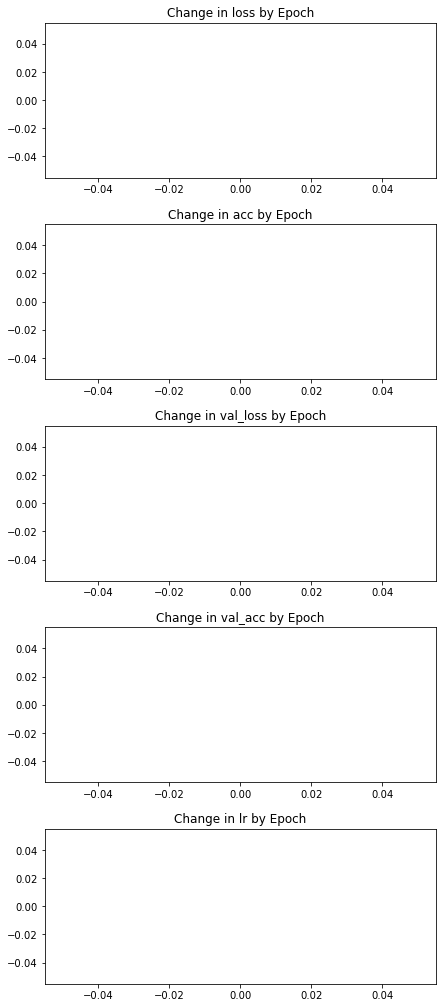

In [240]:
#print(history_decay.history['val_loss'][200:300])
## val loss under 13 would be stronger

my_utils.history_plot(history_decay, start_epoch=100, end_epoch=None)


In [227]:
epochs

300

## Time for a new notebook

Tweaking and manually adjusting settings let me know that it's time to work with a more systematic tuner. I need to search through
some well chosen parameter settings and combine multiple settings at once. Then I need to walk away for a hour or more to let the 
system find quality parameters.

### Things I noticed

Increasing alpha in L2 degraded performance, rather than (as hoped) improving validation performance even if training performance was slightly degraded.

Learning rate adjustments didn't make much difference.  A low initial rate slows the first dozen epochs but after that performs well. Adjusting after the first hundred epochs basically just means a small headstart.